In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

def importar_csv(nome_arquivo):
    try:
        with open(nome_arquivo, newline='') as f:
            reader = csv.reader(f)
            data = list(reader)
        return pd.DataFrame(data[1:], columns=data[0])
    except FileNotFoundError:
        print("Arquivo não encontrado")
        return None


df_vendas_importado = importar_csv("C:/Users/Konrad/Downloads/sales_data_sample.csv")
df_vendas = df_vendas_importado


df_vendas['ORDERDATE'] = pd.to_datetime(df_vendas['ORDERDATE'])
df_vendas['SALES'] = pd.to_numeric(df_vendas['SALES'])
df_vendas['QUANTITYORDERED'] = pd.to_numeric(df_vendas['QUANTITYORDERED'])
df_vendas['PRICEEACH'] = pd.to_numeric(df_vendas['PRICEEACH'])
df_vendas['ORDERLINENUMBER'] = pd.to_numeric(df_vendas['ORDERLINENUMBER'])

df_vendas_importado.head()




,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,,NYC,NY,10022,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,,San Francisco,CA,,USA,NA,Brown,Julie,Medium


In [27]:
df_vendas_importado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   object        
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   object        
 8   MONTH_ID          2823 non-null   object        
 9   YEAR_ID           2823 non-null   object        
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   object        
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

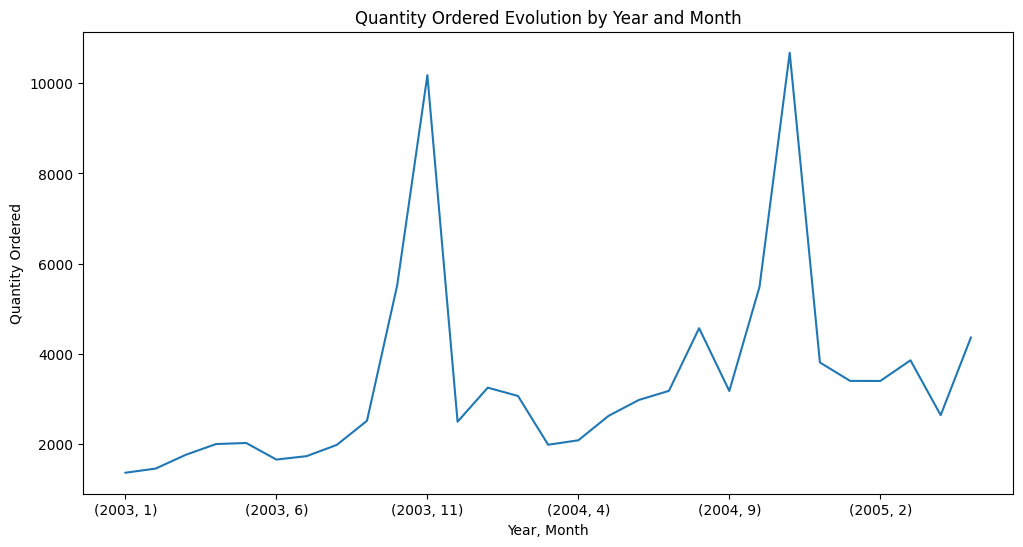

In [ ]:
# Agrupar os dados por ORDERDATE e somar a QUANTITYORDERED
df_vendas_grouped = df_vendas.groupby('ORDERDATE')['QUANTITYORDERED'].sum()

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
df_vendas_evolucao.plot(kind='line')
plt.xlabel('Year, Month')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered Evolution by Year and Month')
plt.show()

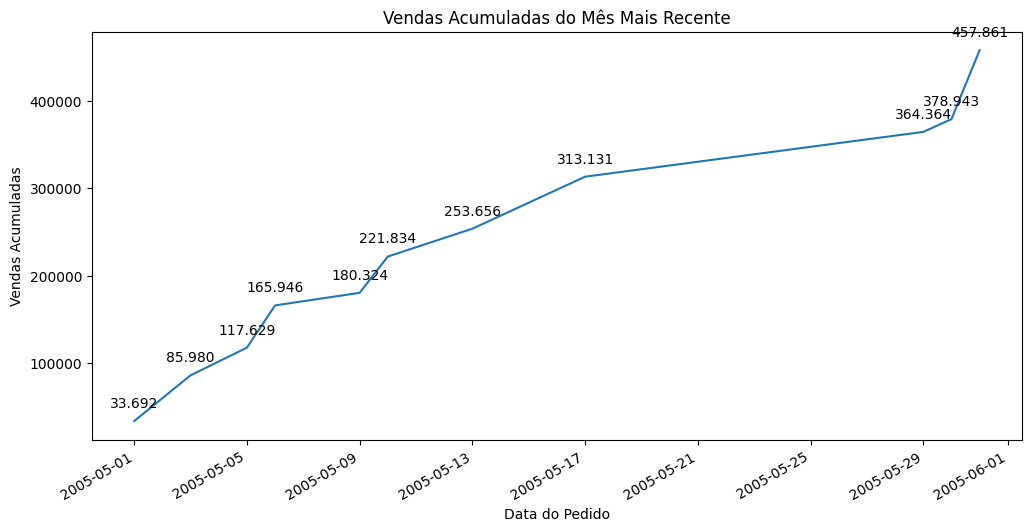

In [39]:
# Filtrar os dados pelo mês mais recente
mes_mais_recente = df_vendas['ORDERDATE'].max().month
ano_mais_recente = df_vendas['ORDERDATE'].max().year
df_vendas_mes_recente = df_vendas[(df_vendas['ORDERDATE'].dt.month == mes_mais_recente) & (df_vendas['ORDERDATE'].dt.year == ano_mais_recente)]

# Agrupar os dados por ORDERDATE e somar as vendas
df_vendas_mes_recente_grouped = df_vendas_mes_recente.groupby('ORDERDATE')['SALES'].sum()

# Calcular a soma acumulada das vendas
df_vendas_mes_recente_grouped_cumsum = df_vendas_mes_recente_grouped.cumsum()

# Plotar o gráfico de linha acumulado
plt.figure(figsize=(12, 6))
ax = df_vendas_mes_recente_grouped_cumsum.plot(kind='line')
plt.xlabel('Data do Pedido')
plt.ylabel('Vendas Acumuladas')
plt.title('Vendas Acumuladas do Mês Mais Recente')

# Adicionar labels aos pontos de dados
for x, y in df_vendas_mes_recente_grouped_cumsum.items():
    ax.annotate(f'{int(y):,}'.replace(',', '.'), xy=(x, y), textcoords='offset points', xytext=(0, 10), ha='center')

plt.show()

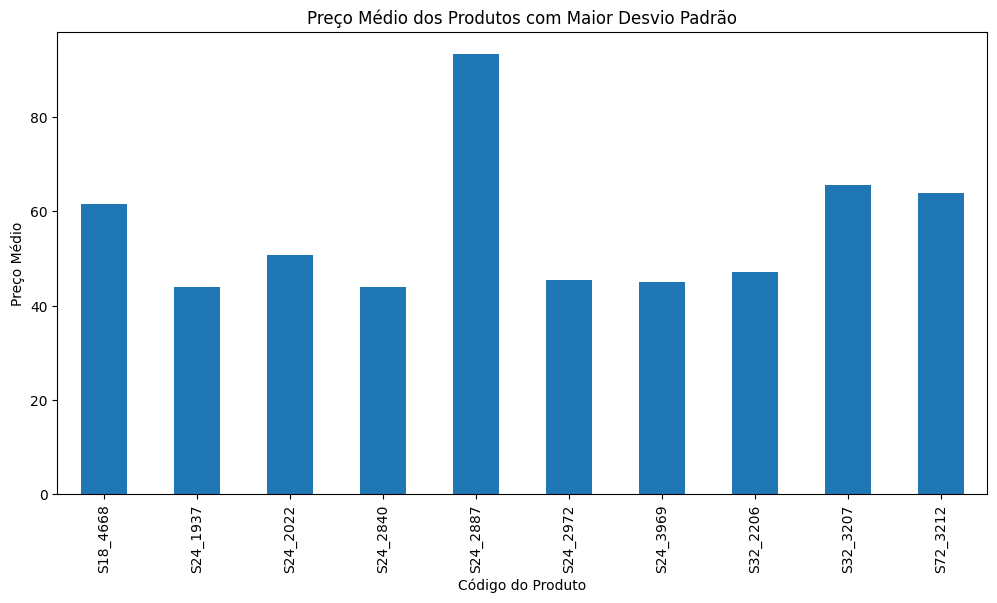

In [40]:
# Calcular o desvio padrão dos preços de cada produto
desvio_padrao_precos = df_vendas.groupby('PRODUCTCODE')['PRICEEACH'].std()

# Selecionar os produtos com maior desvio padrão
top_desvio_padrao = desvio_padrao_precos.nlargest(10)

# Calcular o preço médio desses produtos
preco_medio_top_desvio_padrao = df_vendas[df_vendas['PRODUCTCODE'].isin(top_desvio_padrao.index)].groupby('PRODUCTCODE')['PRICEEACH'].mean()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
preco_medio_top_desvio_padrao.plot(kind='bar')
plt.xlabel('Código do Produto')
plt.ylabel('Preço Médio')
plt.title('Preço Médio dos Produtos com Maior Desvio Padrão')
plt.show()

PRODUCTCODE
S18_4933    714
S24_1046    724
S18_2248    743
S24_3969    745
S18_2581    746
S18_4409    750
S24_3191    779
S24_1785    784
S18_2795    789
S12_3990    800
Name: QUANTITYORDERED, dtype: int64


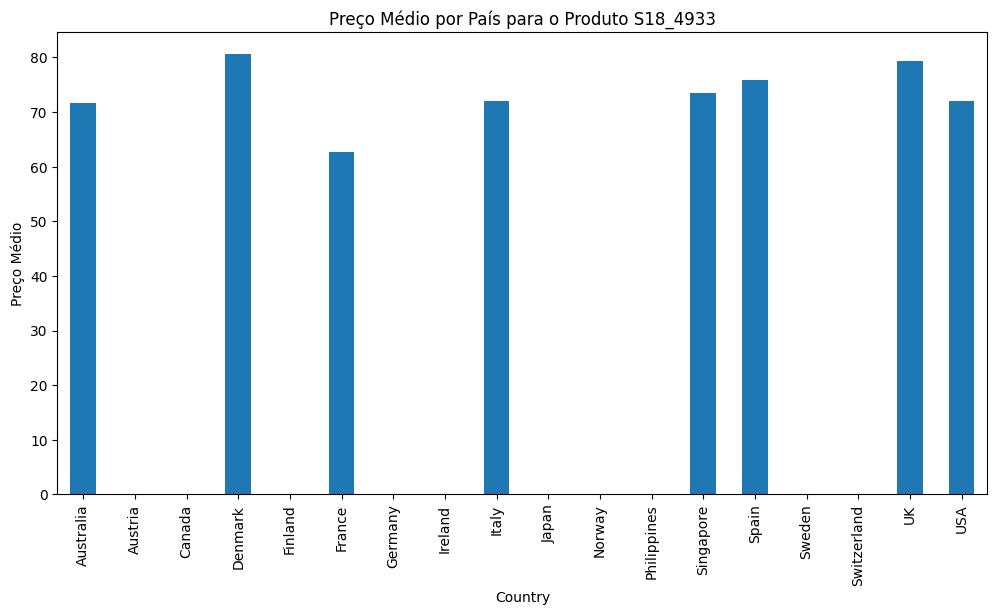

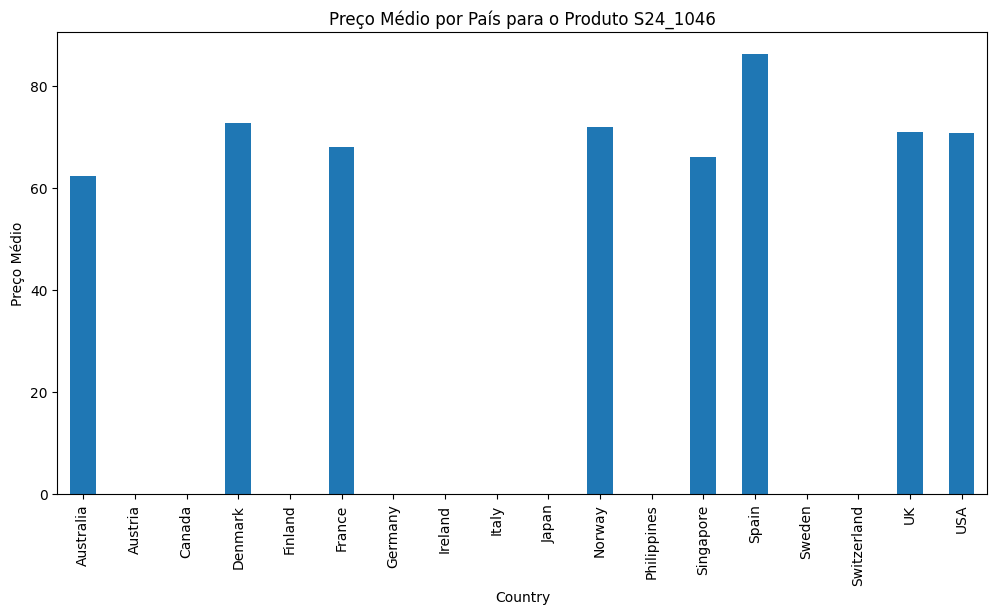

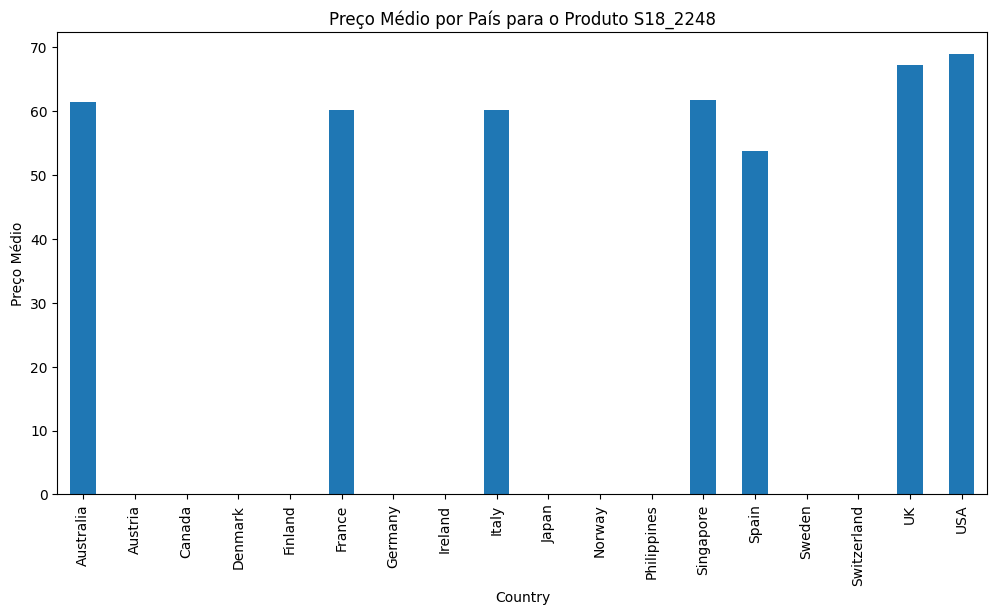

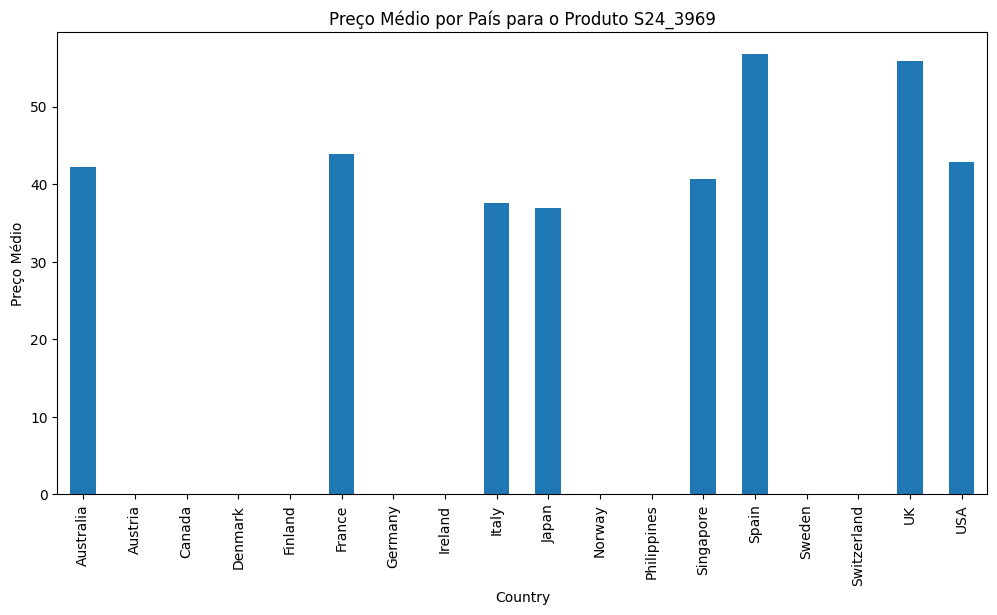

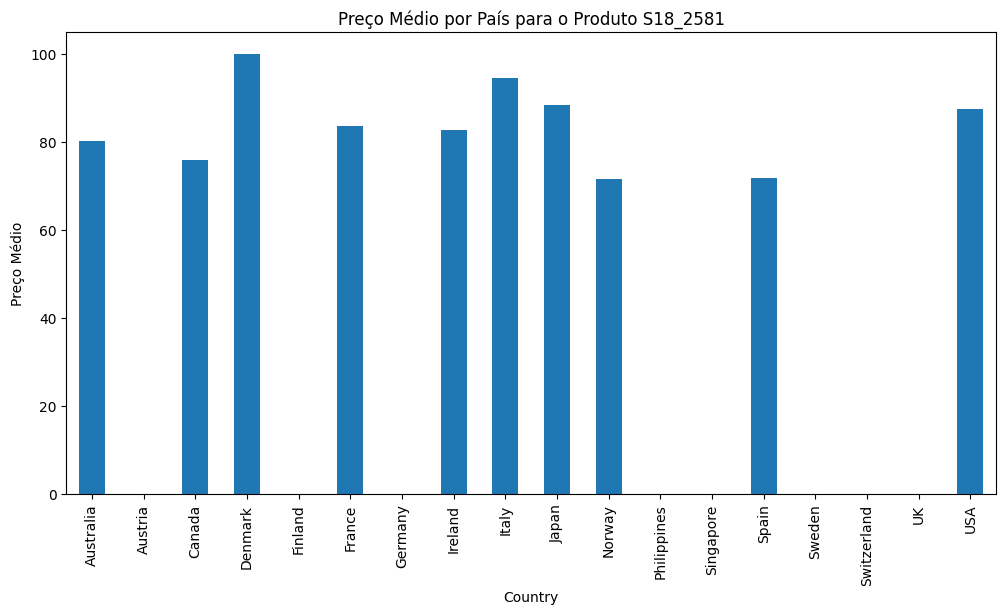

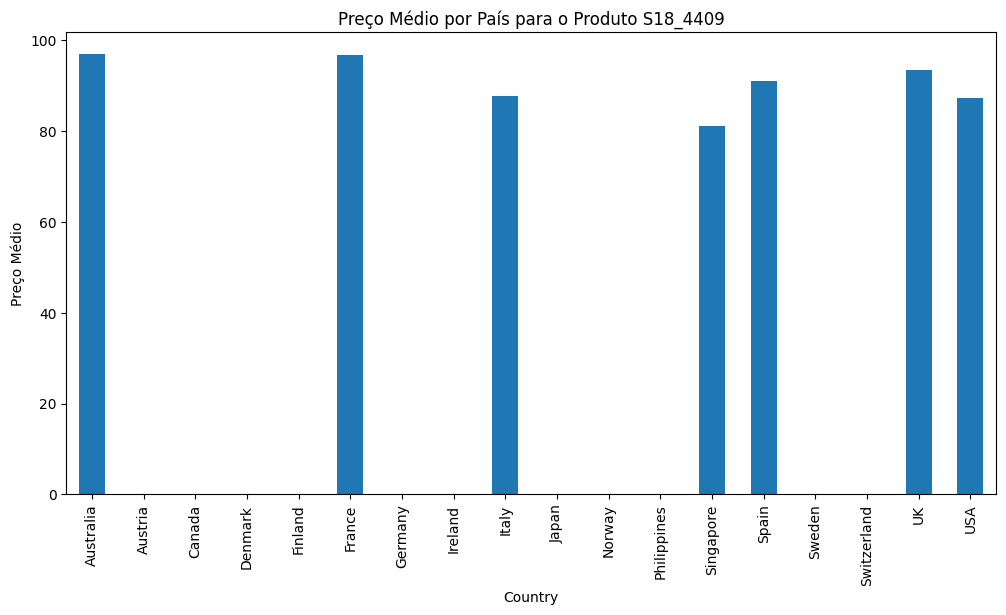

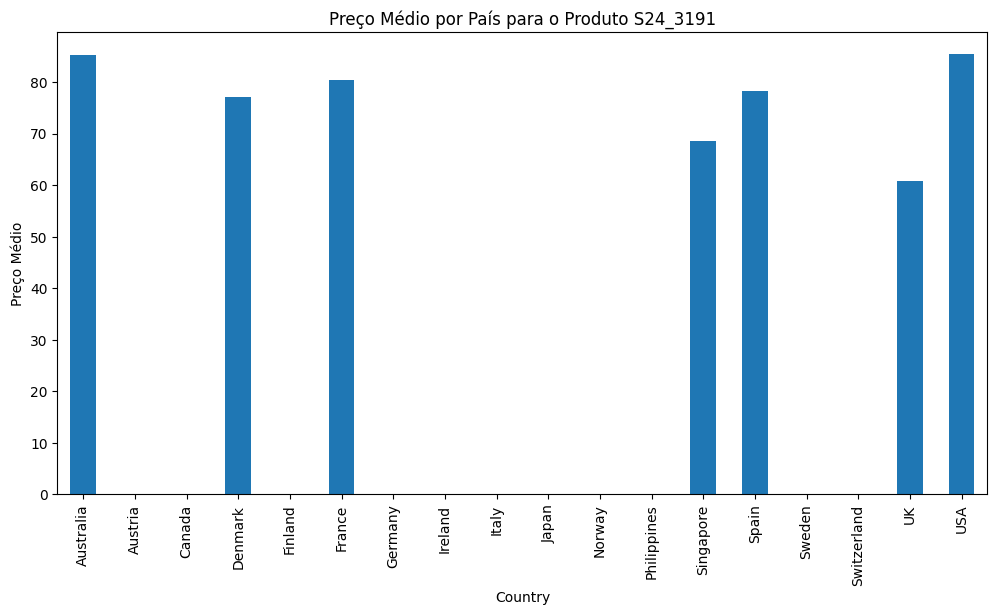

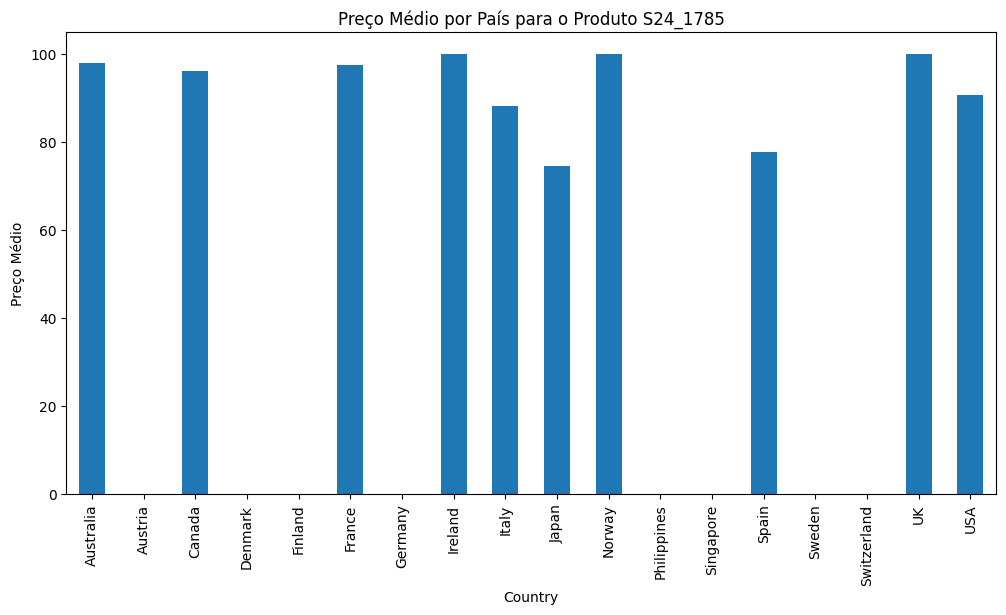

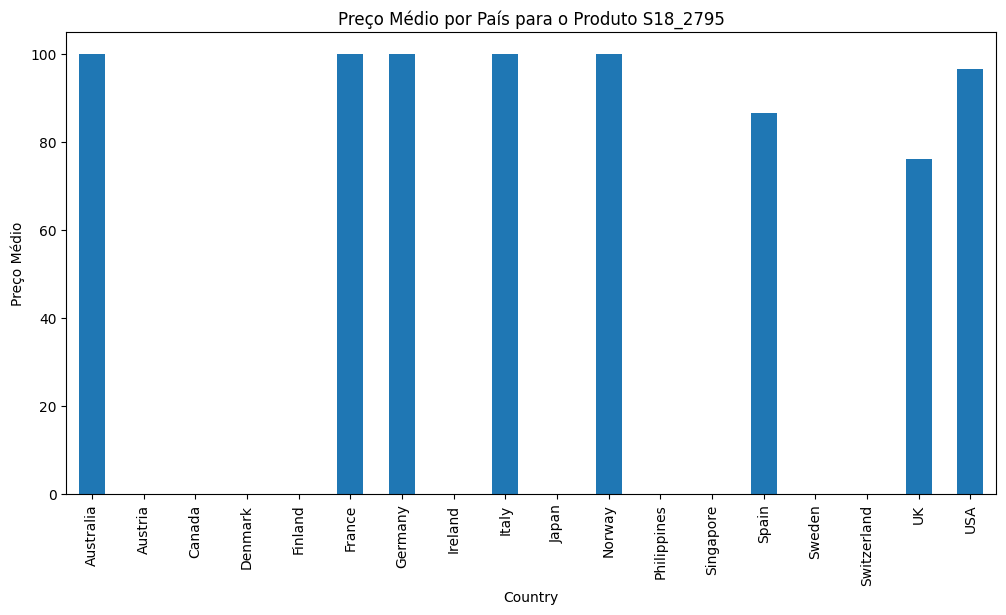

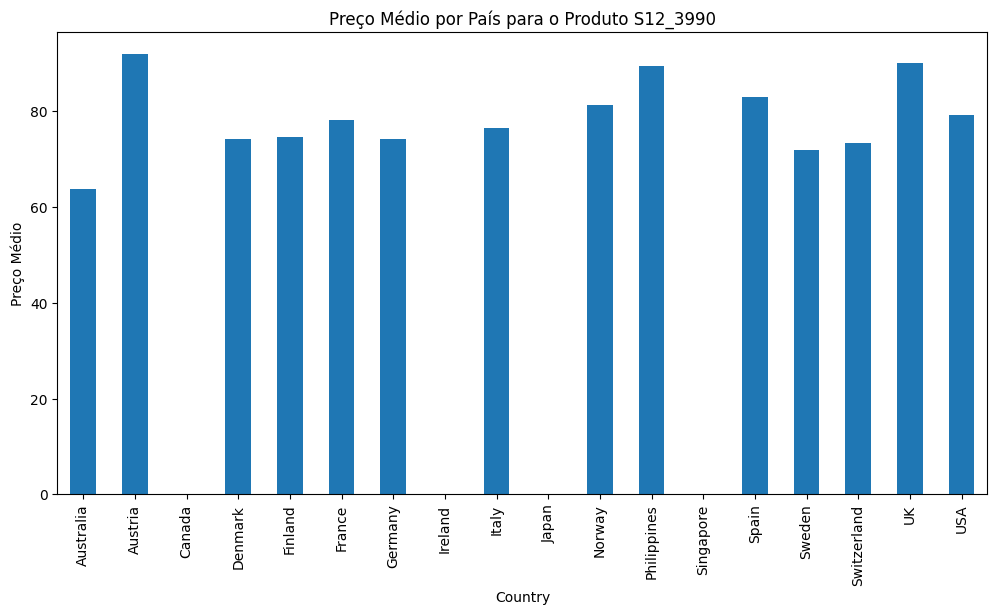

In [41]:
# Listar os produtos menos vendidos
produtos_menos_vendidos = df_vendas.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum().nsmallest(10)
print(produtos_menos_vendidos)

# Filtrar os dados para os produtos menos vendidos
df_produtos_menos_vendidos = df_vendas[df_vendas['PRODUCTCODE'].isin(produtos_menos_vendidos.index)]

# Calcular o preço médio por COUNTRY para cada produto menos vendido
preco_medio_por_pais = df_produtos_menos_vendidos.groupby(['PRODUCTCODE', 'COUNTRY'])['PRICEEACH'].mean().unstack()

# Plotar gráficos de barra para cada produto menos vendido
for product_code in produtos_menos_vendidos.index:
    plt.figure(figsize=(12, 6))
    preco_medio_por_pais.loc[product_code].plot(kind='bar')
    plt.xlabel('Country')
    plt.ylabel('Preço Médio')
    plt.title(f'Preço Médio por País para o Produto {product_code}')
    plt.show()